# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

## Loading the dataset

In [2]:
data = pd.read_csv("Loan_Modelling.csv")

# save data into a version as a copy 
loans = data.copy()

## Data Overview

* Observations
* Sanity checks

In [3]:
loans.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
loans.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [5]:
loans.shape

(5000, 14)

In [6]:
loans.describe(include="all")

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# converts the selected columns into the object type for decision tree modelling 
selected_columns= ['Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


for col in selected_columns:
    loans[col] = loans[col].astype('object')

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   object 
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   object 
 11  CD_Account          5000 non-null   object 
 12  Online              5000 non-null   object 
 13  CreditCard          5000 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

Text(0.5, 1.0, 'Histogram showing Mortgage')

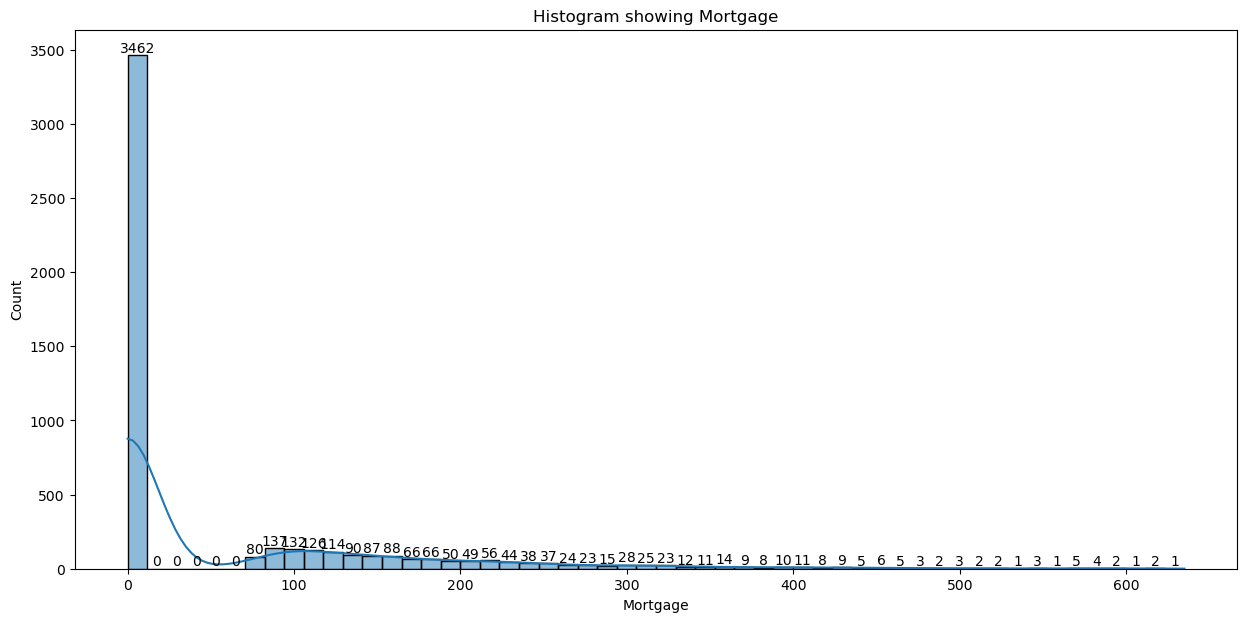

In [10]:
# Write the code here
plt.figure(figsize=(15,7))

    
# Plot Histogram
labelled = sns.histplot(data=loans, x='Mortgage',  kde=True)


# Annotate bars with counts
for p in labelled.patches:
    labelled.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    
plt.title('Histogram showing Mortgage')

- The noticeable pattern is that mortgages with the value = 0 has the highest count of 3462. Otherwise, the number of mortgages gradually decreases when mortgage is around 90 until mortgage value is up to about 620. 

In [11]:
#finding the value of the upper bound in the boxplot , to find the outliers 
q3 = np.percentile(loans['Mortgage'], 75)
q1 = np.percentile(loans['Mortgage'], 25)
iqr = q3- q1
upper_bound = q3 + (1.5 * iqr) # the multiplier is taken as 1.5 

print(upper_bound)

252.5


Text(0.5, 1.0, 'Box Plot showing Mortgage')

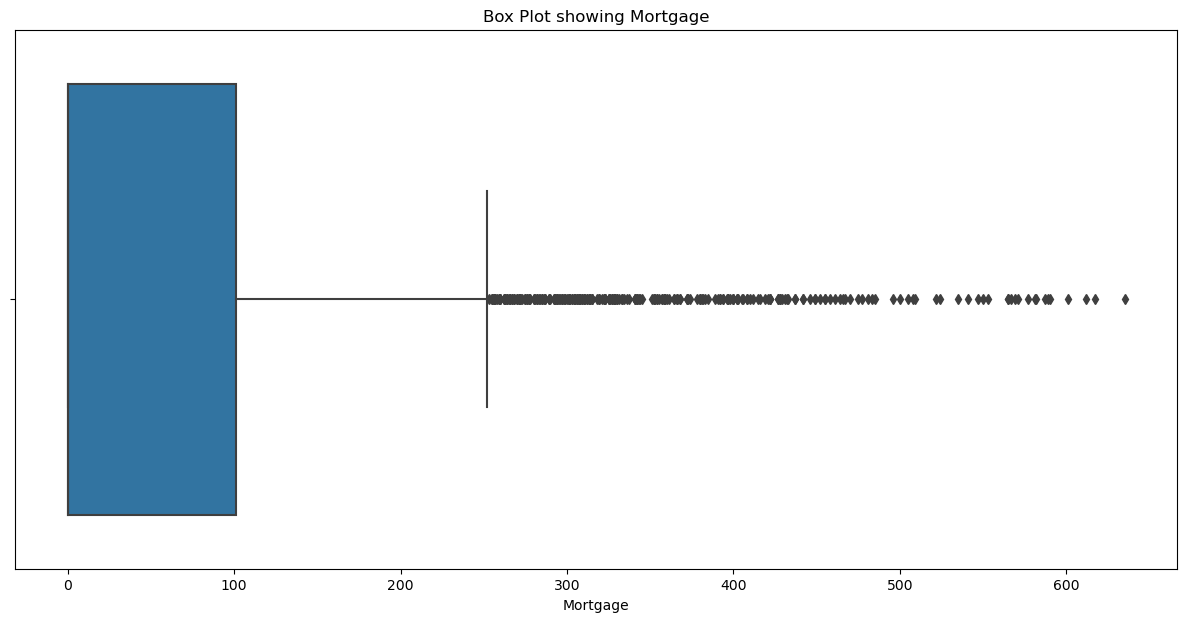

In [12]:

plt.figure(figsize=(15,7))

# Plot Boxplot
sns.boxplot(data =loans, x = 'Mortgage');

plt.title('Box Plot showing Mortgage')

- The outlier mortgage values are those records where mortgage value is greater than 252.5 (upper bound of box plot). 

Text(0.5, 1.0, 'Distribution Plot of CreditCard')

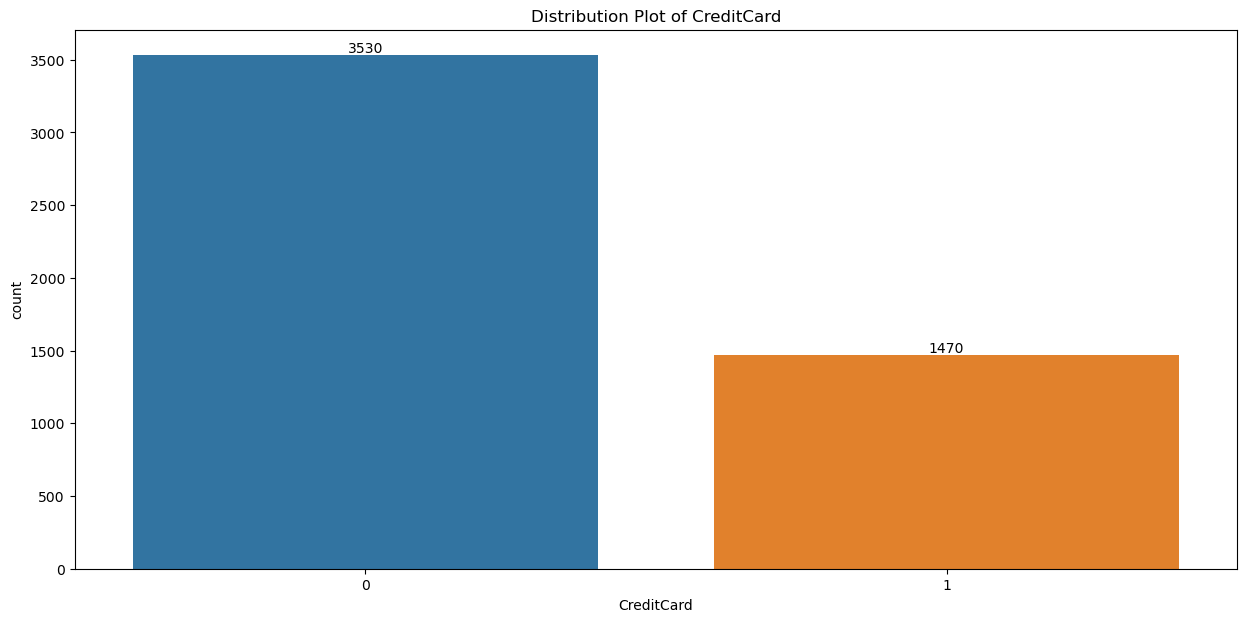

In [13]:
plt.figure(figsize=(15,7))


labelled_count = sns.countplot(data=loans, x='CreditCard')



# Annotate bars with counts
for p in labelled_count.patches:
    labelled_count.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    
plt.title('Distribution Plot of CreditCard')


- There are 3530 customers whose creditcard = 0 and 1470 customers whose creditcard = 1. 

In [14]:
count_creditcard_0 = len(loans[loans['CreditCard'] == 0])
count_creditcard_1 = len(loans[loans['CreditCard'] == 1])

# Display the counts as statements
print(f"When CreditCard=0, the number count is {count_creditcard_0}")
print(f"When CreditCard=1, the number count is {count_creditcard_1}")

When CreditCard=0, the number count is 3530
When CreditCard=1, the number count is 1470


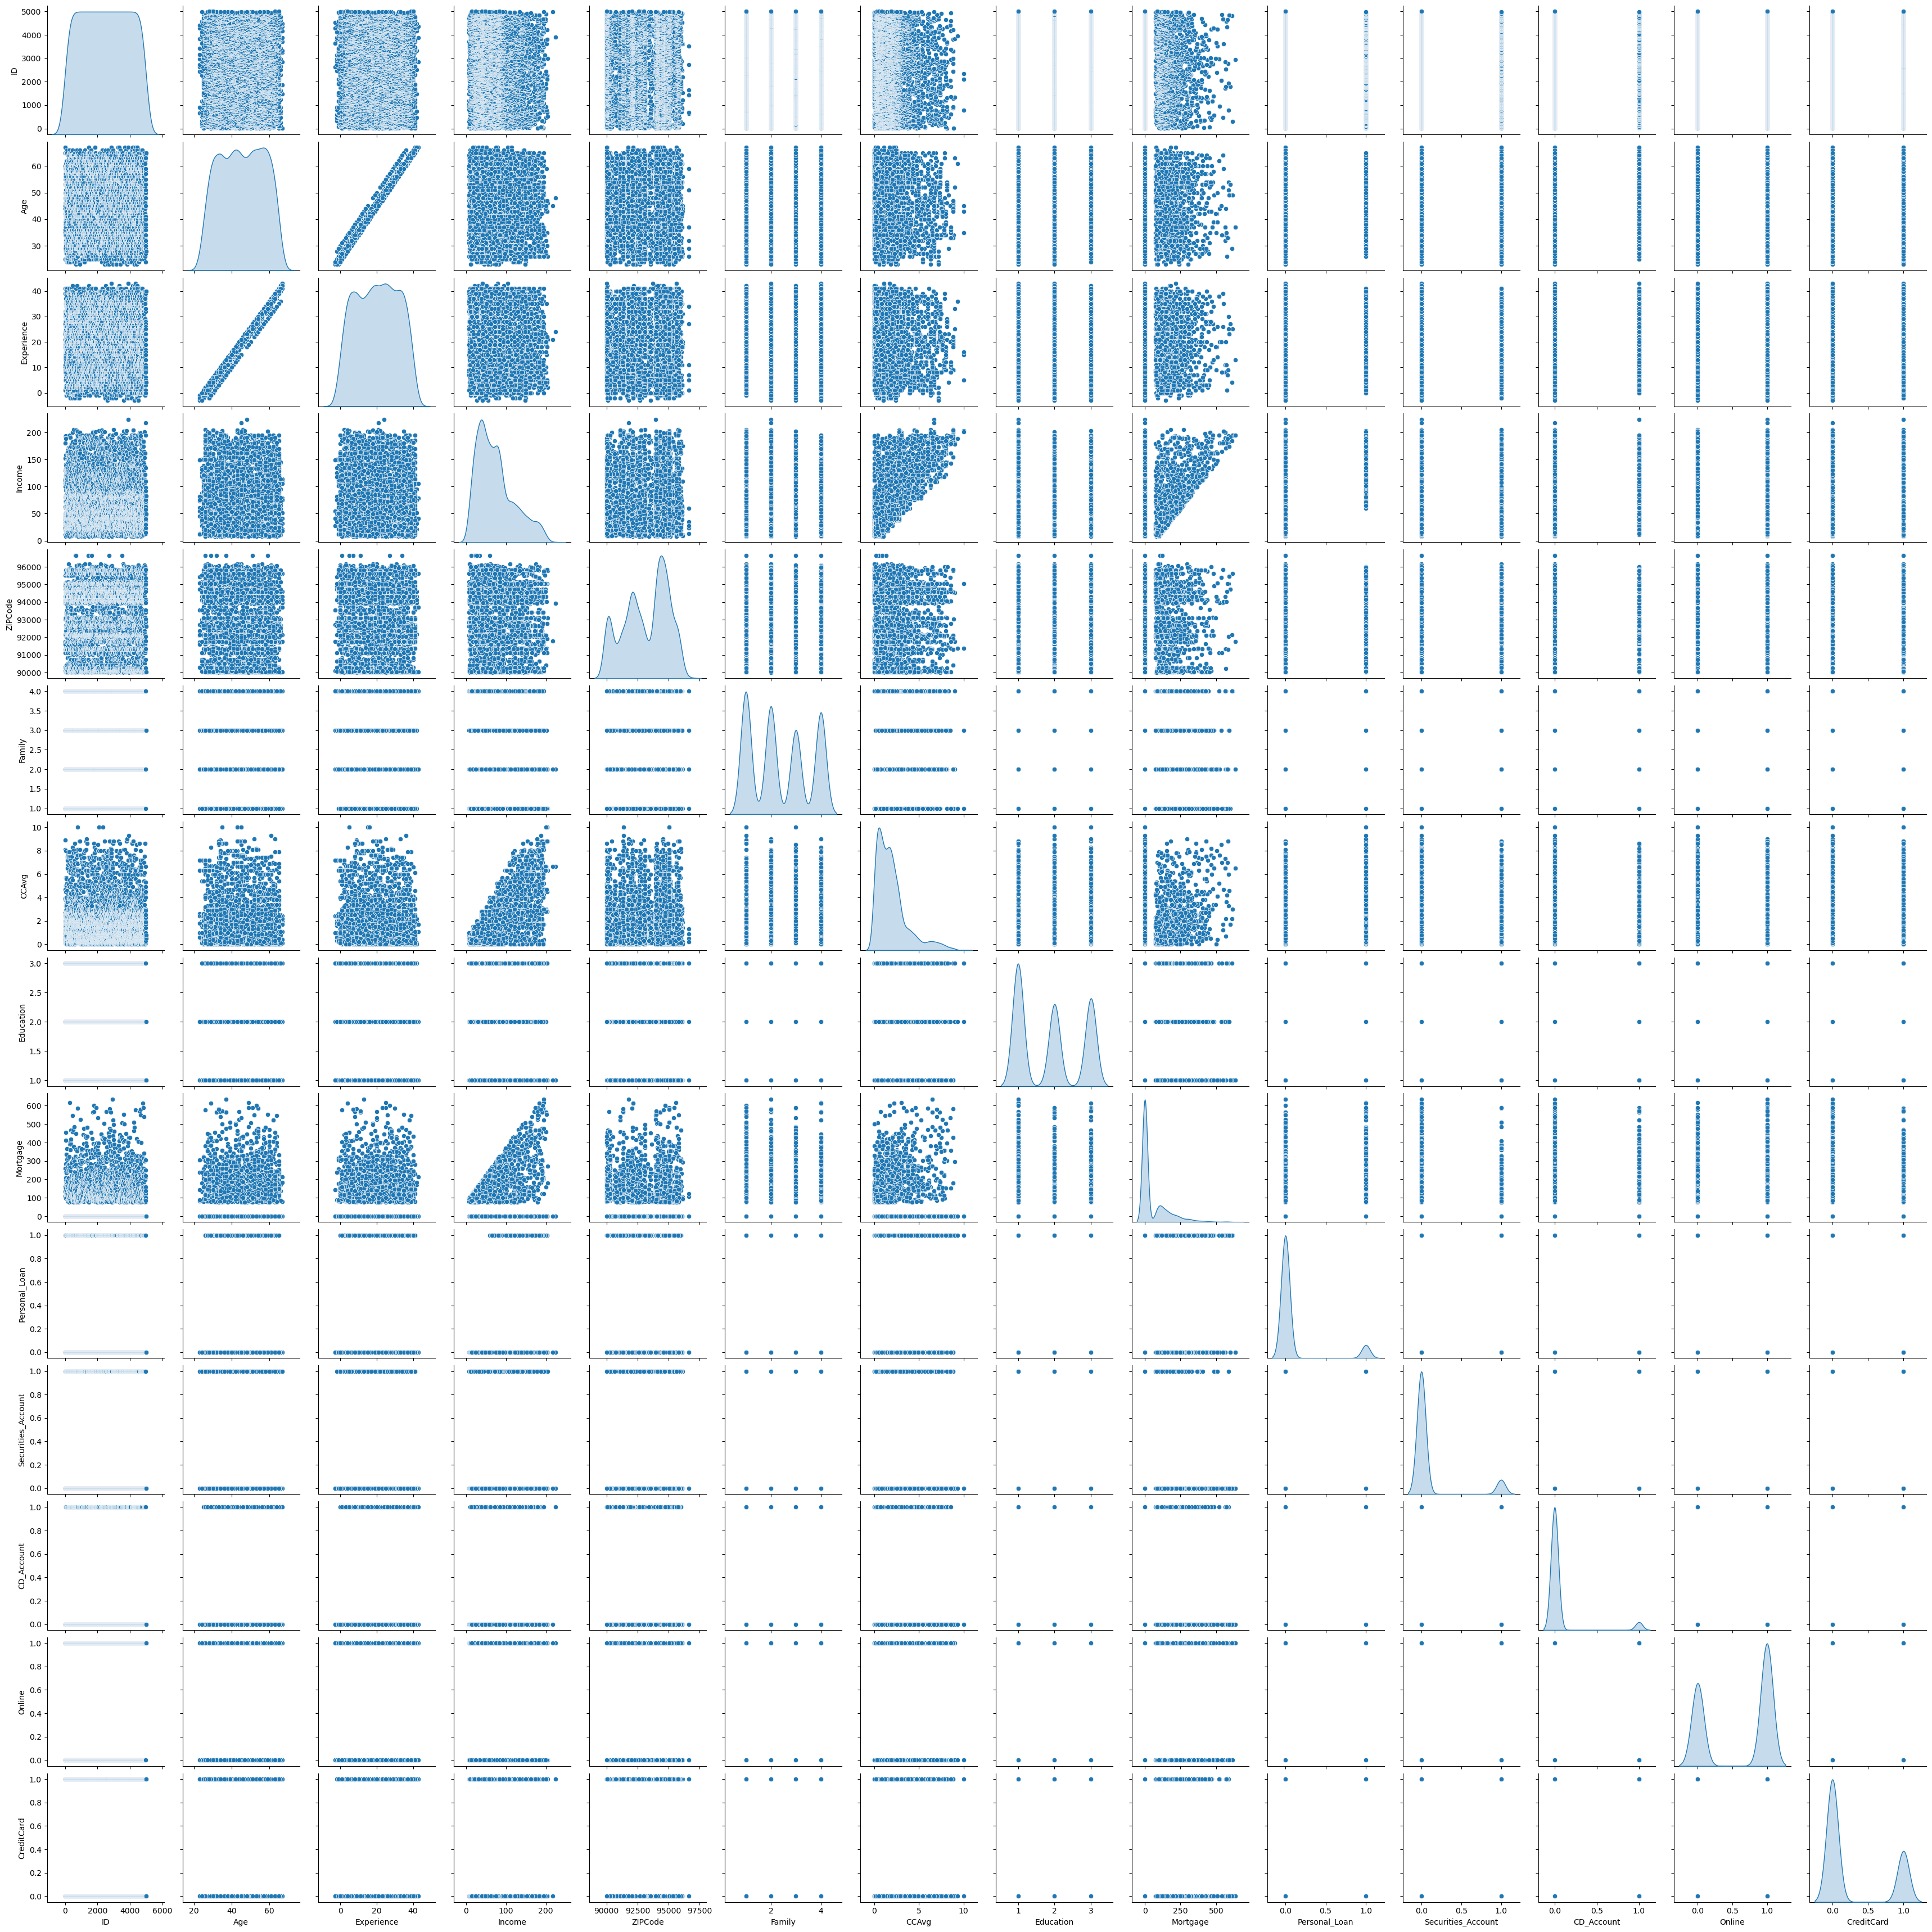

In [15]:
# Plot the pairplot
sns.pairplot(loans, diag_kind="kde");

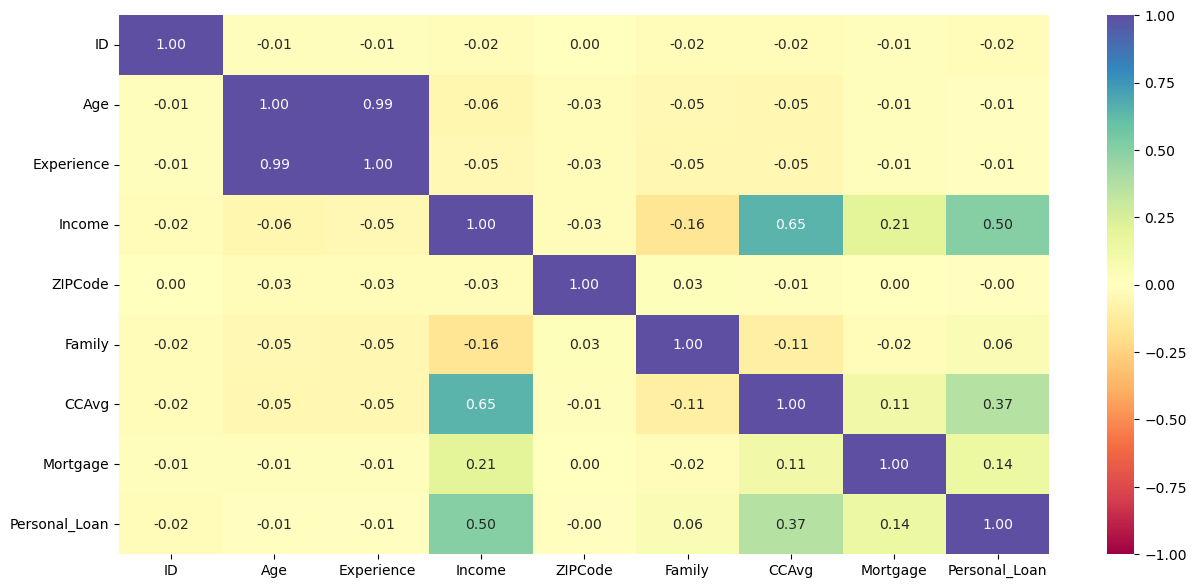

In [16]:
# plot the correlation heat map for all variables 
plt.figure(figsize=(15, 7))
sns.heatmap(loans.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- The only two variables with a high correlation is between age and experience (0.99). 
- While the correlation between CCAvg and Income is rather substantial (0.65), looking at the pairplot of CCAvg against income 
reveals that it is unlikely for the two variables to be correlated. This is because while someone is granted a maximum credit spending once they earn above a certain income, there is no guarantee that such a person will actually incur this CCAvg every month.   
- Thus, for personal_loan itself, none of the variables are strongly correlated to Personal_Loan (no correlation values 
are greater than 0.50). 

In [17]:
loans['Personal_Loan'].unique()

array([0, 1], dtype=int64)

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    
    #data[predictor] = data[predictor].astype(int)
    
    
    #old way - cannot sort
    #tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
    #    by=sorter, ascending=False
    #)
    
    
    # new way - create crosstab sorted by the "Age" column in increasing order
    tab1 = pd.crosstab(data[predictor], data[target], margins=True)
    
    
    print(tab1)
    print("-" * 120)
    #old way - cannot sort
    #tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
    #    by=sorter, ascending=False
    #)
    tab = pd.crosstab(data[predictor], data[target], normalize="index")
    
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 15))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Age                           
23               12    0    12
24               28    0    28
25               53    0    53
26               65   13    78
27               79   12    91
28               94    9   103
29              108   15   123
30              119   17   136
31              118    7   125
32              108   12   120
33              105   15   120
34              116   18   134
35              135   16   151
36               91   16   107
37               98    8   106
38              103   12   115
39              127    6   133
40              117    8   125
41              128    8   136
42              112   14   126
43              134   15   149
44              107   14   121
45              114   13   127
46              114   13   127
47              103   10   113
48              106   12   118
49              105   10   115
50              125   13   138
51              119   10   129
52              130   15   145
53      

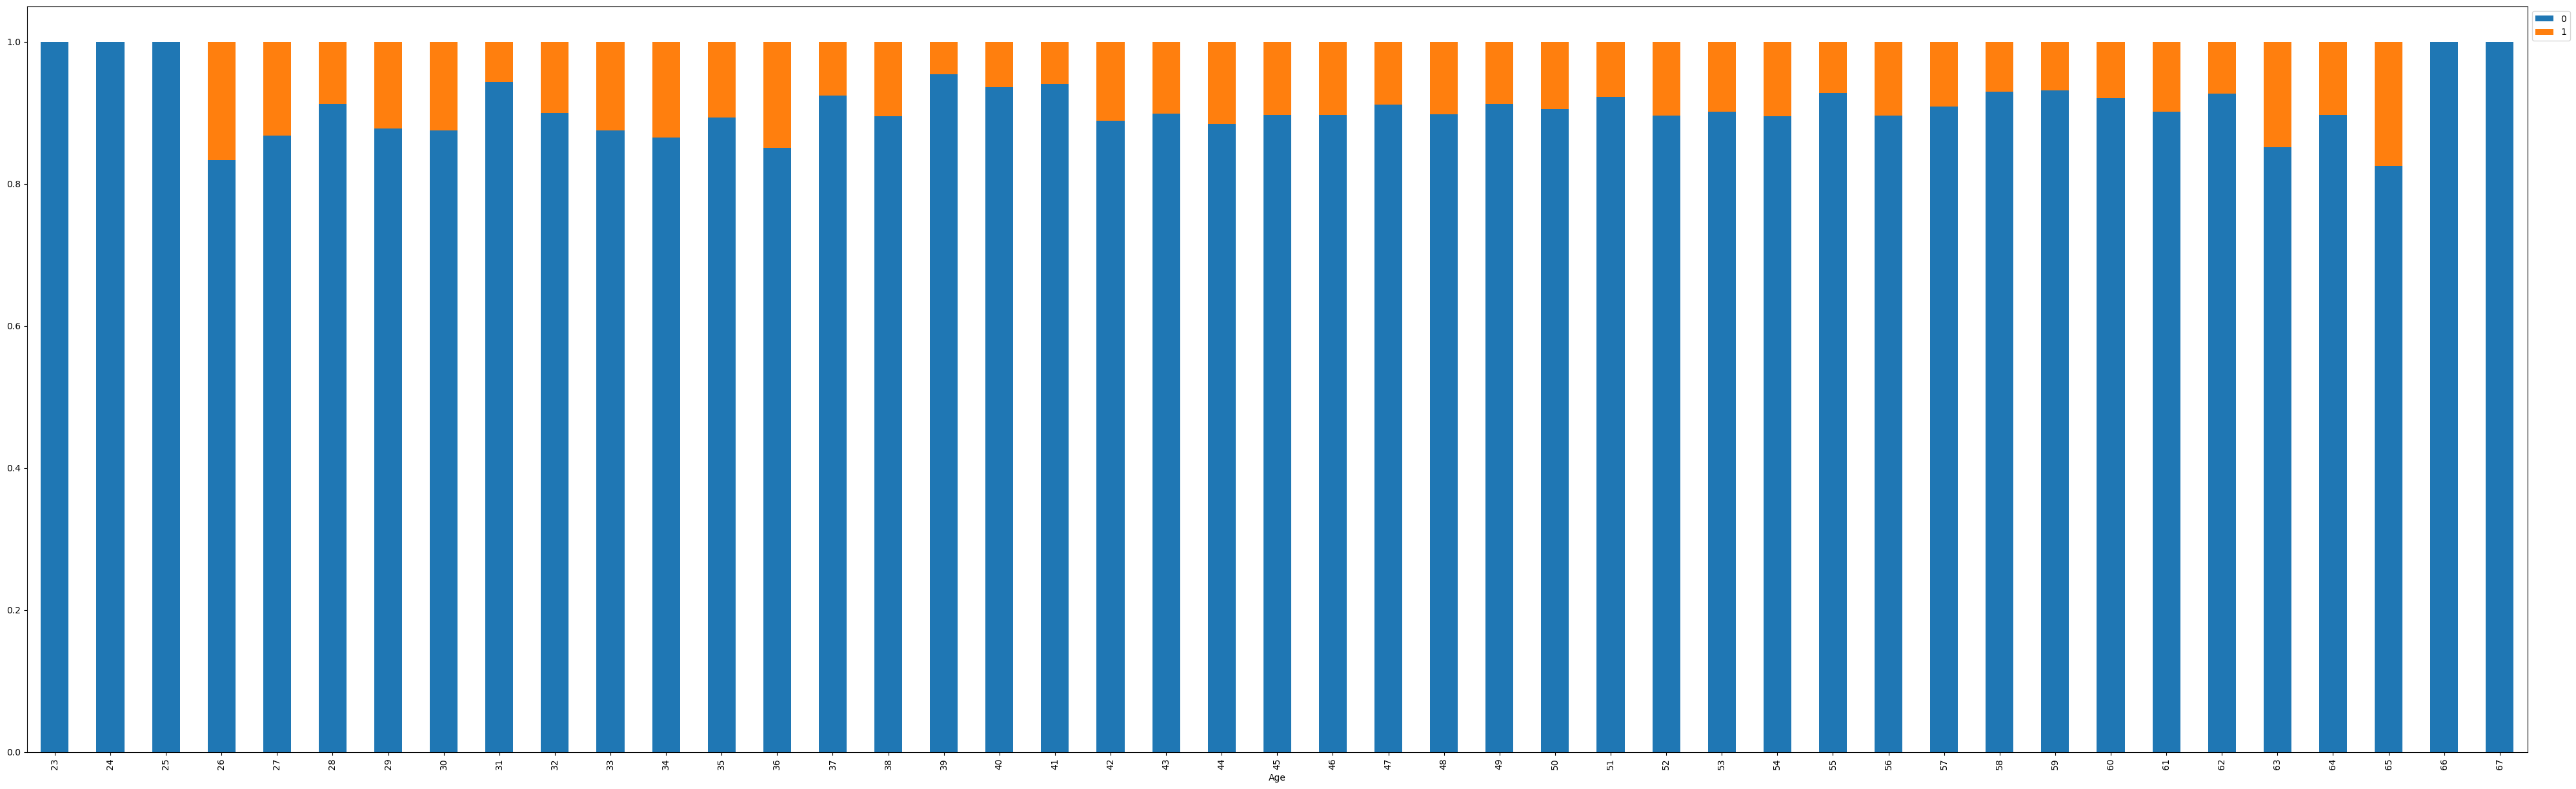

In [19]:
stacked_barplot(loans, "Age", "Personal_Loan")

- This shows the normalised cross tab plot of the count of people who take up a Personal Loan, based on their age. It reveals that at age 23,24,25 and 66 , 67 - these customers are quite unlikely to take up a  Personal Loan because none of the sample participants did so. From the ages between 26 - 65, there is no clear trend of a popular age of customer who takes up a Personal Loan as it fluctuates up and down. 
- In terms of number count, the age of 34 records the highest count of 18 people, who took up the Personal Loan. Whereas, the age of 39 records the lowest count of 6 people, who took up the Personal Loan.

In [20]:

def stacked_barplot_original(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


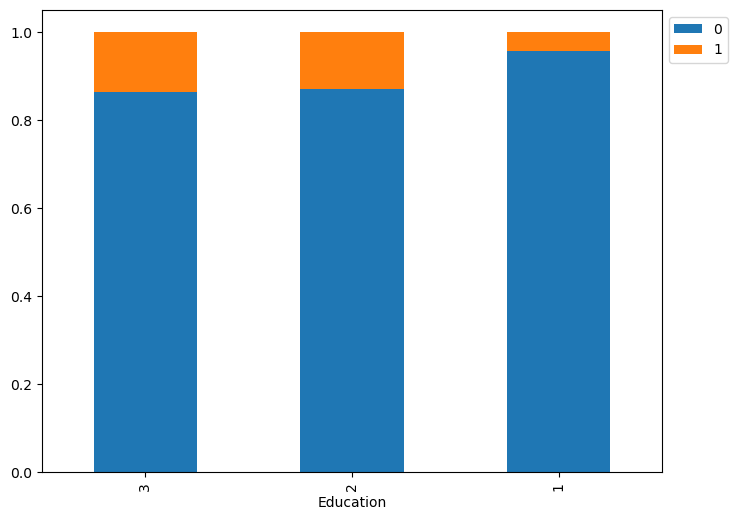

In [21]:
stacked_barplot_original(loans, "Education", "Personal_Loan")

- Education level = 3 refers to  Advanced/Professional, while Education  level = 2 refers to a Graduate, while Education level = 1 refers to an Undergrad;
- Those with education level = 3 and education level = 2 are more likely to take up a personal loan, compared to customers with education level = 1. 
- Under the cross tab table (tab1), with regards to customer number count for Personal Loan, the age of 34 records the highest count of 18 people who took up the Personal Loan. 

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [22]:
loans.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There are no rows with variables that are null. 

In [23]:
X = loans.drop(["Personal_Loan","ZIPCode"], axis=1)
y = loans["Personal_Loan"]

In [24]:
X.head()

ID  Age  Experience  Income  Family  CCAvg Education  Mortgage  \
0   1   25           1      49       4    1.6         1         0   
1   2   45          19      34       3    1.5         1         0   
2   3   39          15      11       1    1.0         1         0   
3   4   35           9     100       1    2.7         2         0   
4   5   35           8      45       4    1.0         2         0   

  Securities_Account CD_Account Online CreditCard  
0                  1          0      0          0  
1                  1          0      0          0  
2                  0          0      0          0  
3                  0          0      0          0  
4                  0          0      0          1

In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [26]:
#make dummy variables of the variables with data type as object
X = pd.get_dummies(X, drop_first=True)
X.head()

ID  Age  Experience  Income  Family  CCAvg  Mortgage  Education_2  \
0   1   25           1      49       4    1.6         0            0   
1   2   45          19      34       3    1.5         0            0   
2   3   39          15      11       1    1.0         0            0   
3   4   35           9     100       1    2.7         0            1   
4   5   35           8      45       4    1.0         0            1   

   Education_3  Securities_Account_1  CD_Account_1  Online_1  CreditCard_1  
0            0                     1             0         0             0  
1            0                     1             0         0             0  
2            0                     0             0         0             0  
3            0                     0             0         0             0  
4            0                     0             0         0             1

In [27]:
#check again that data type has been converted to object 
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   object 
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   object 
 11  CD_Account          5000 non-null   object 
 12  Online              5000 non-null   object 
 13  CreditCard          5000 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [29]:
print("Row count for training data =", X_train.shape[0])
print("Row count for testing data =", X_test.shape[0])

Row count for training data = 3000
Row count for testing data = 2000


In [30]:
print("Percentage of values in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of values in testing set:")
print(y_test.value_counts(normalize=True))

Percentage of values in training set:
0    0.904333
1    0.095667
Name: Personal_Loan, dtype: float64
Percentage of values in testing set:
0    0.9035
1    0.0965
Name: Personal_Loan, dtype: float64


- In the training set, 90.43% of people took a Personal Loan, while  9.57% of people did not take a Personal Loan.
- In the testing set, 90.35% of people took a Personal Loan, while  9.65% of people did not take a Personal Loan.

## Model Building

In [31]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [32]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


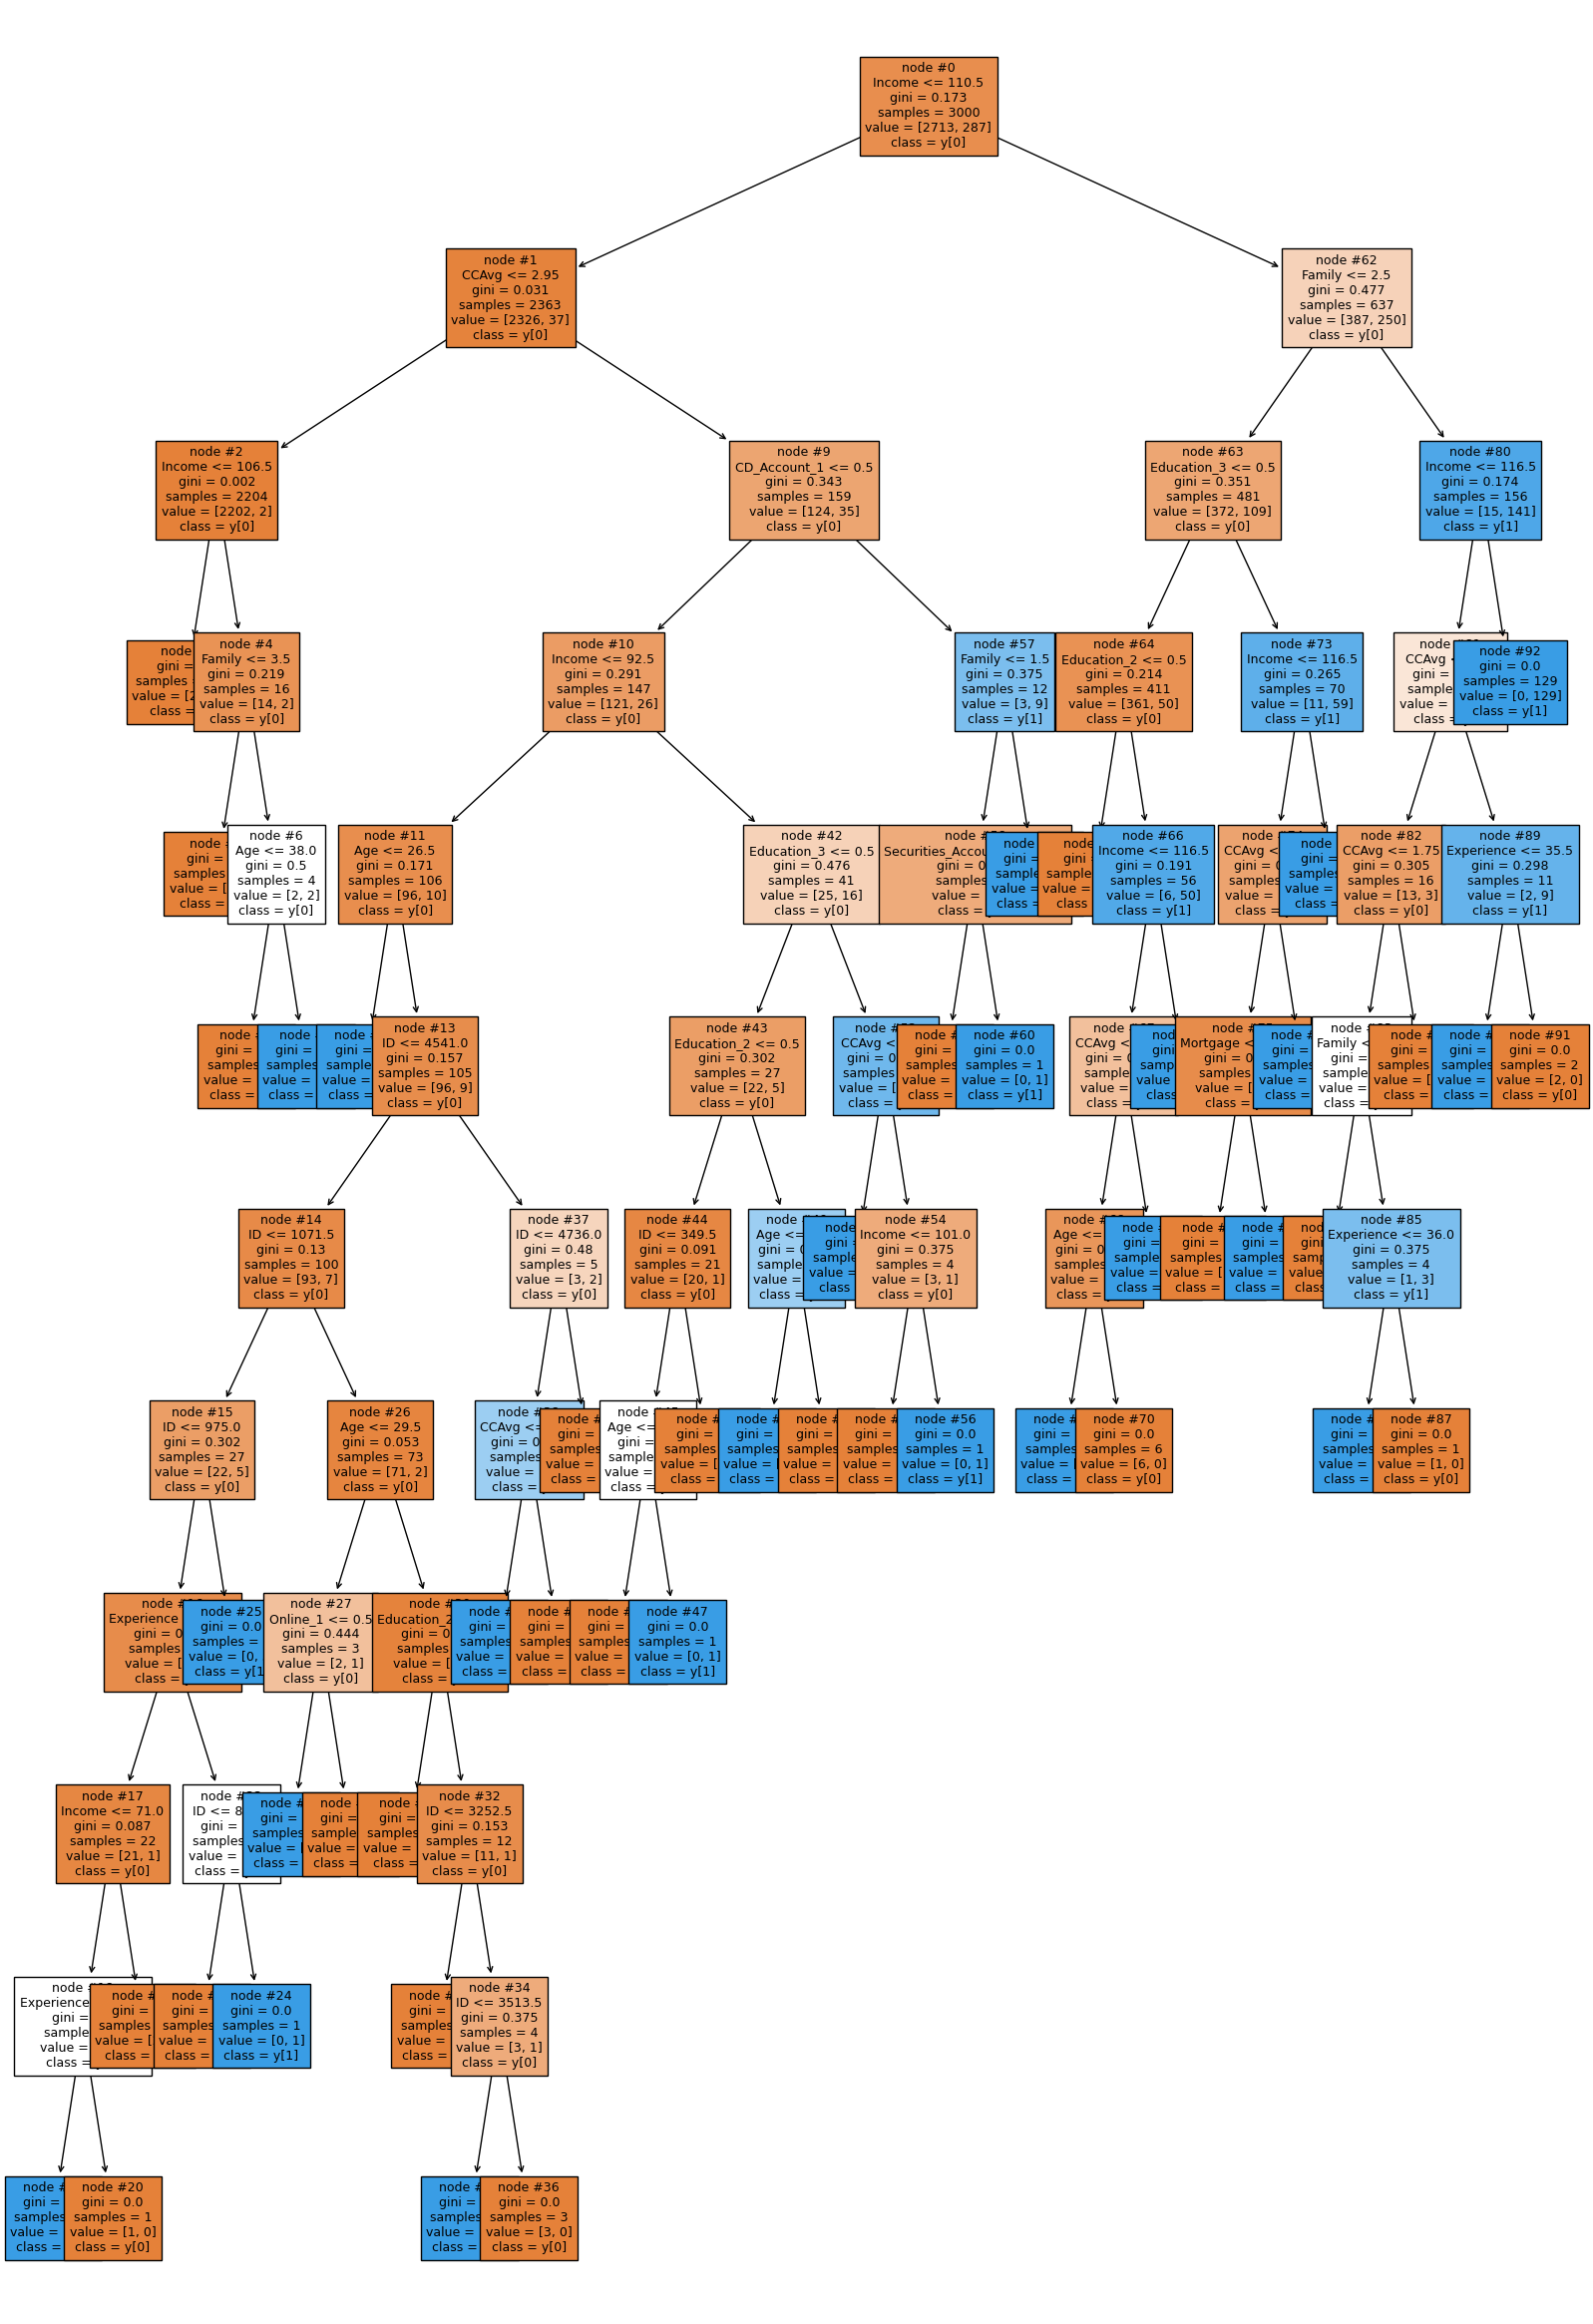

In [33]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

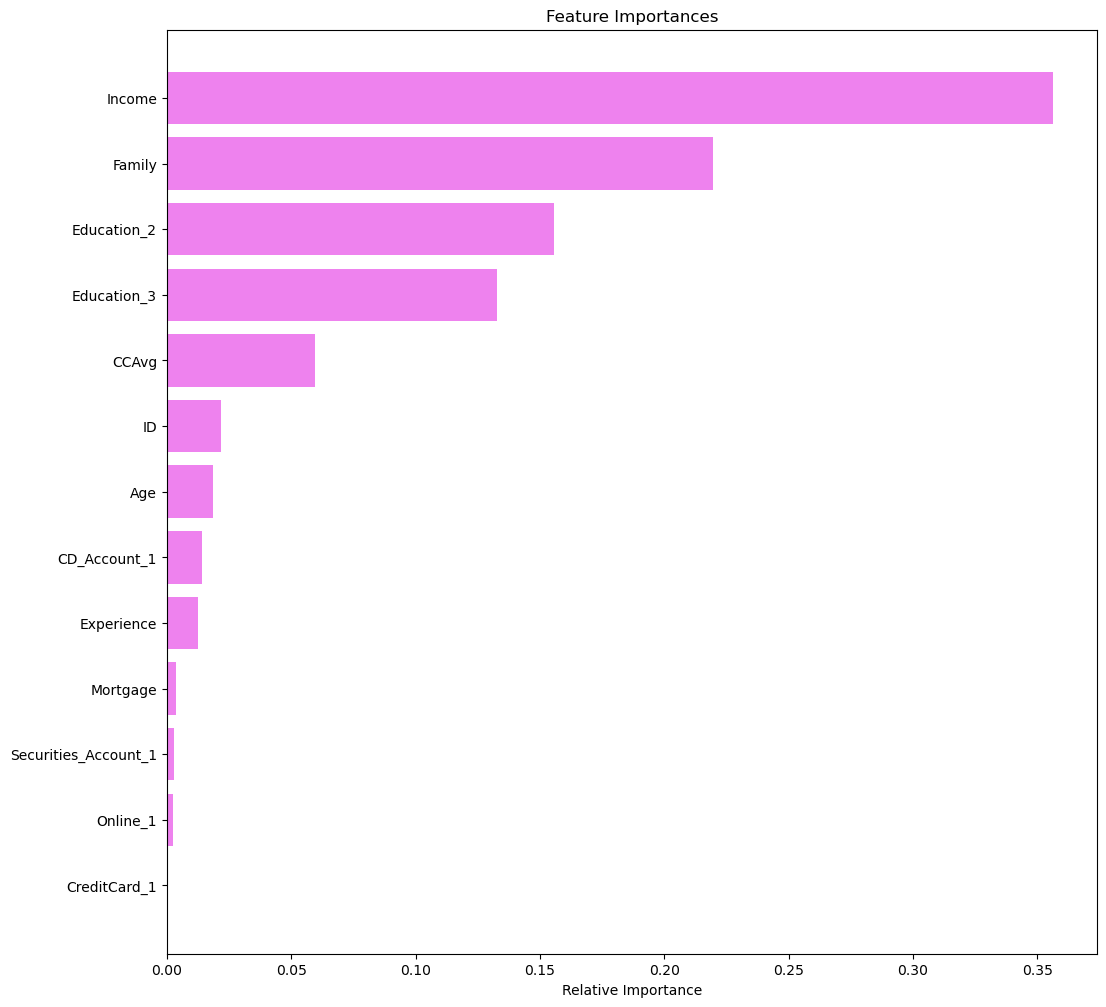

In [34]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Model Evaluation Criterion

* There are two cases of wrong predictions. 
- A) Predict a customer will take up a personal loan ,but does not take up the personal loan in reality. 
- B) Predict customer will not take up personal loan, but actually takes up personal loan in reality. 

- The more important case to look out for is Case B). The cost is greater as these customers will be missed out and neglected, causing the bank revenue in extending or proposing these customers to take up a personal loan. 

- The cost is lower for the false positive (Case A). This is because there is not much expenses for the bank to reach out to false positive cases, probably just through emailing them if they are interested in applying for loan. Reaching out to this false positive group, and them eventually not deciding to take up the Personal Loan, does not result in big losses for the bussiness. 

- Thus, the false negative cases should be minimised. 

- The value of recall should be maximised in the chosen model. This is because when recall is larger value, the greater are the chances of reducing the false negatives. 


In [35]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [36]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [37]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

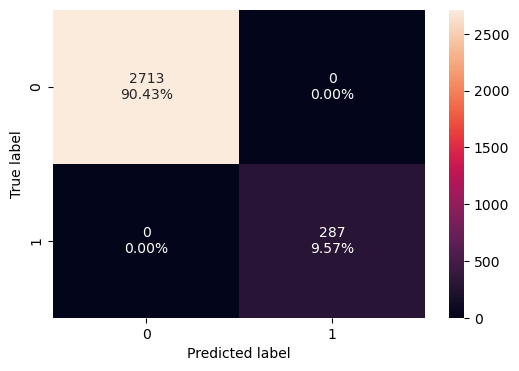

In [38]:
confusion_matrix_sklearn(model, X_train, y_train)

- The recall value on the training model is 1.0.

In [39]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0    0.9795  0.870466   0.913043  0.891247

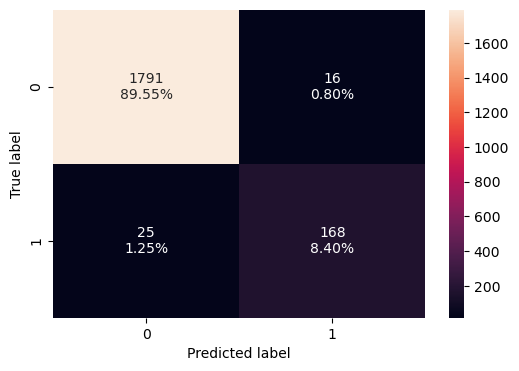

In [40]:
confusion_matrix_sklearn(model, X_test, y_test)

- The recall value on the testing model is 0.87.

### Model Building

In [41]:
# Build model to find improved model using pre pruning. 
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=1e-06,
                       random_state=1)

- The best estimator model from the pre-pruning model building is as follow:
- It selects the criterion = 'entropy', value of min_impurity_decrease =1e-06. 

### Model Performance Improvement

In [42]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

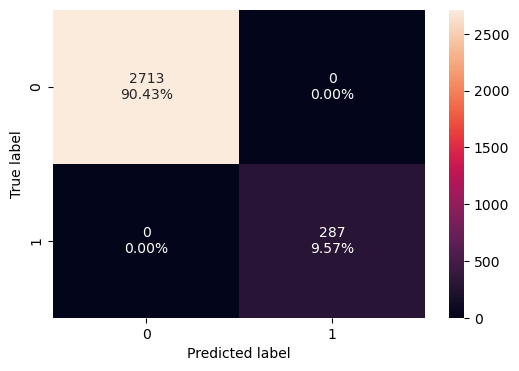

In [43]:
confusion_matrix_sklearn(estimator, X_train, y_train)

- The recall value on the estimator training model is 1.0.

In [44]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0    0.9845  0.901554   0.935484  0.918206

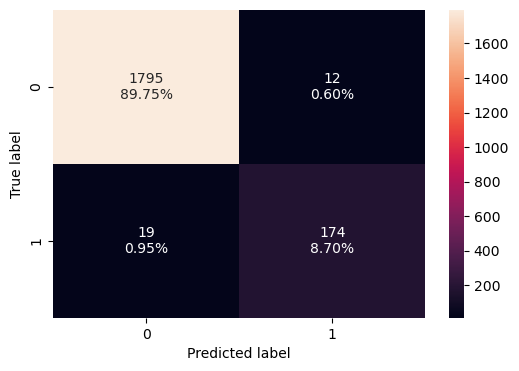

In [45]:
confusion_matrix_sklearn(estimator, X_test, y_test)

- The recall value on the estimator testing model is 0.90.

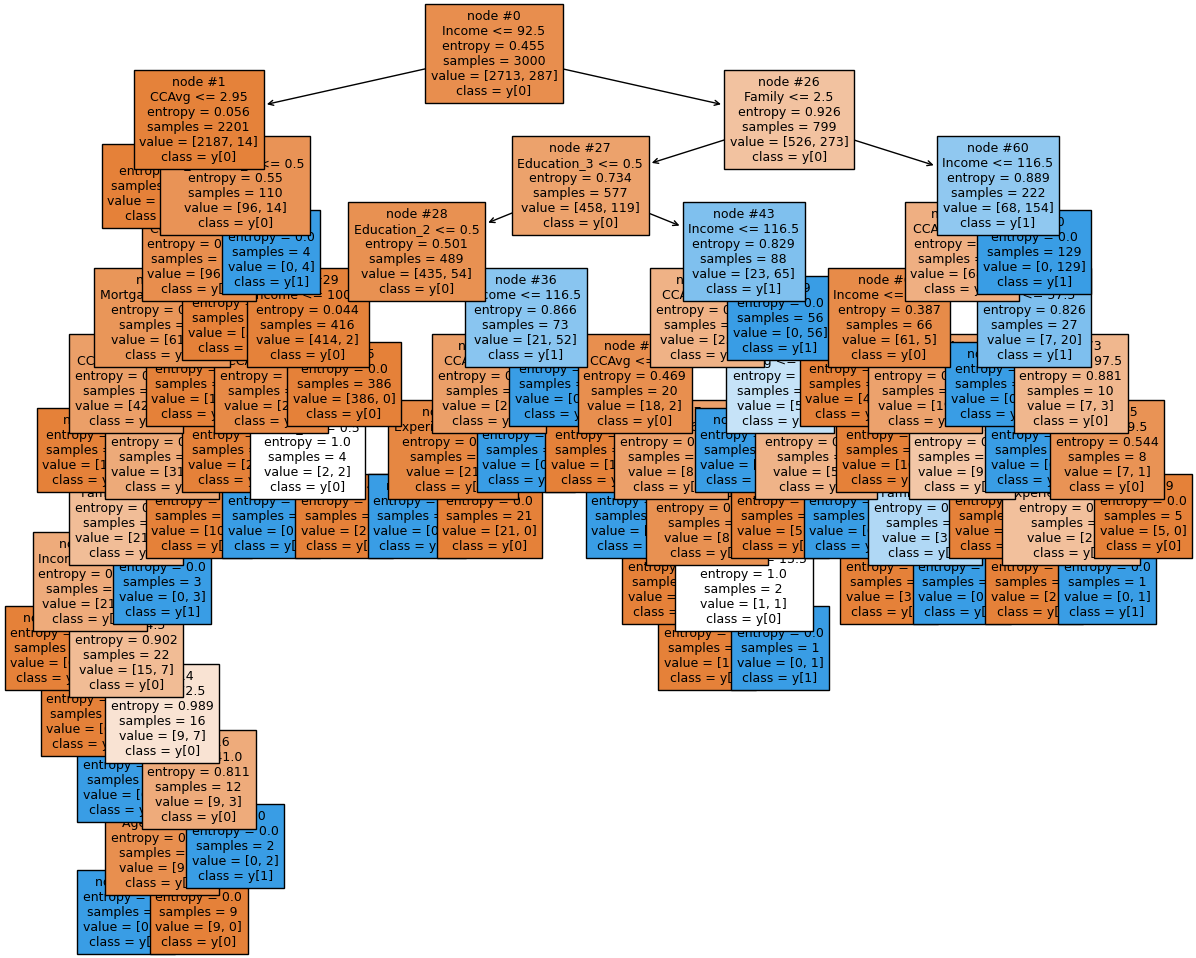

In [46]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

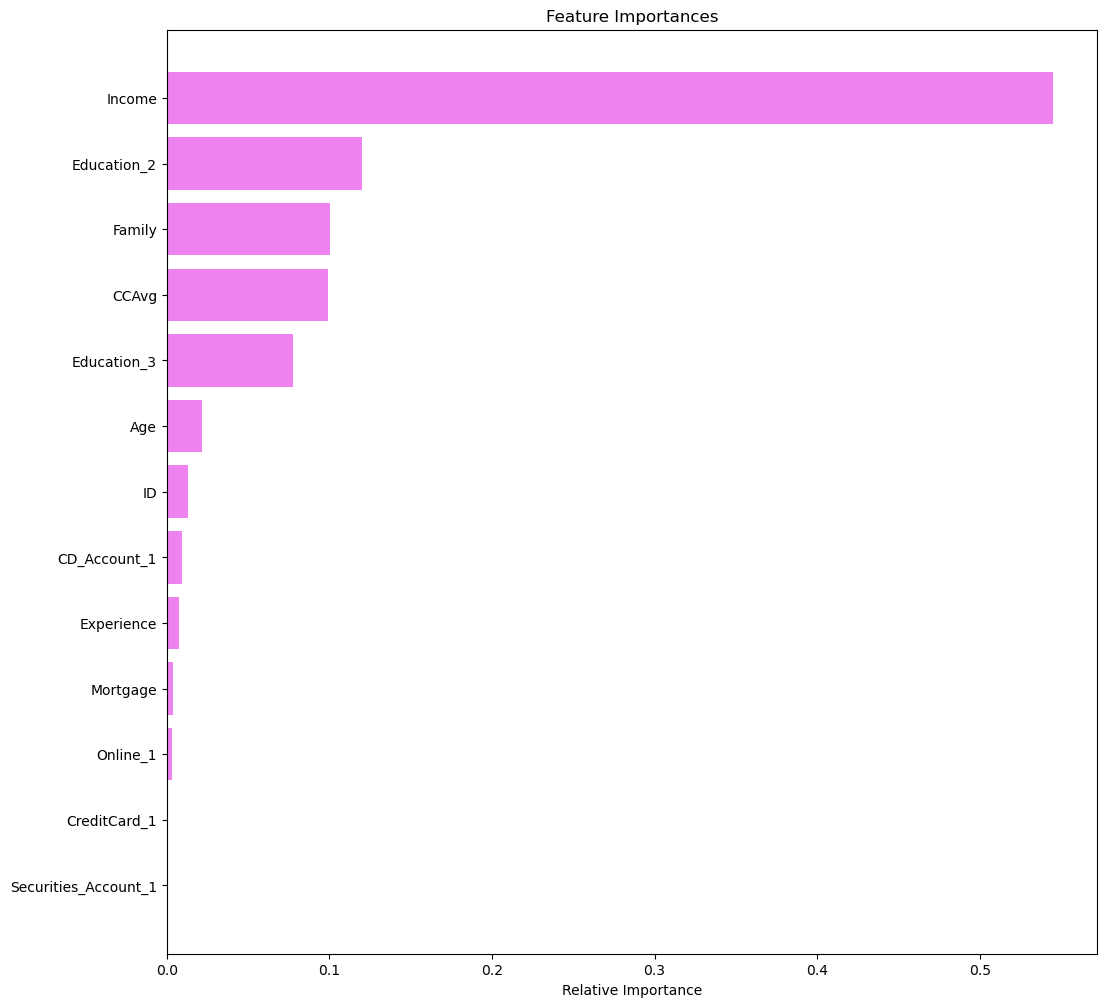

In [47]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [48]:
# using cost complexity 
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [49]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000219    0.000657
2     0.000306    0.001879
3     0.000317    0.002514
4     0.000320    0.003154
5     0.000400    0.003954
6     0.000444    0.005286
7     0.000500    0.005786
8     0.000500    0.006286
9     0.000500    0.007286
10    0.000571    0.007857
11    0.000611    0.008469
12    0.000625    0.009094
13    0.000680    0.011812
14    0.000762    0.012574
15    0.000889    0.013463
16    0.000960    0.014423
17    0.001000    0.015423
18    0.001071    0.016495
19    0.001091    0.017586
20    0.001192    0.018778
21    0.001729    0.020507
22    0.001971    0.024449
23    0.002238    0.026687
24    0.002429    0.029116
25    0.004594    0.033711
26    0.004610    0.038320
27    0.004751    0.043071
28    0.023224    0.089518
29    0.036018    0.125536
30    0.047493    0.173029

In [50]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04749278966498974


In [51]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


In [52]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [53]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [54]:
# find best model with greatest recall test score
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0010714285714285717, random_state=1)


- The post pruning best model is selected with ccp_alpha = 0.0011 (2 decimal places).

In [55]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0      0.99  0.923345   0.970696  0.946429

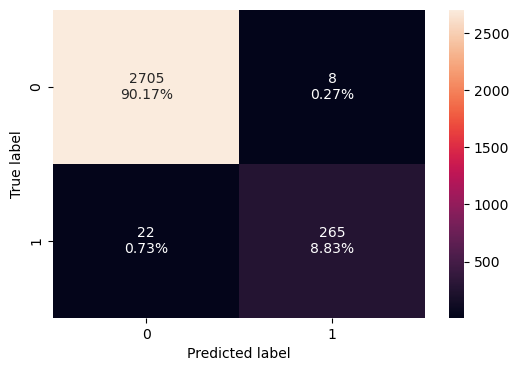

In [56]:
confusion_matrix_sklearn(best_model, X_train, y_train)

- The recall value on the post_pruning testing model is 0.92.

In [57]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0    0.9825  0.875648   0.938889  0.906166

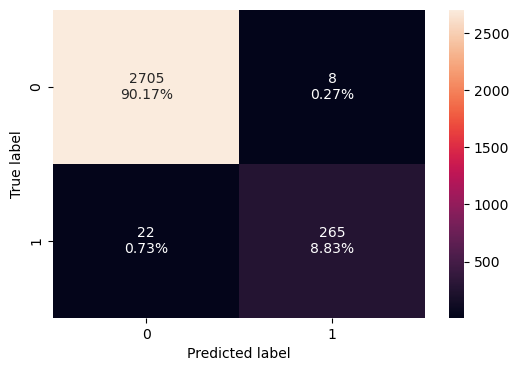

In [58]:
confusion_matrix_sklearn(best_model, X_train, y_train)

- The recall value on the post_pruning testing model is 0.88.

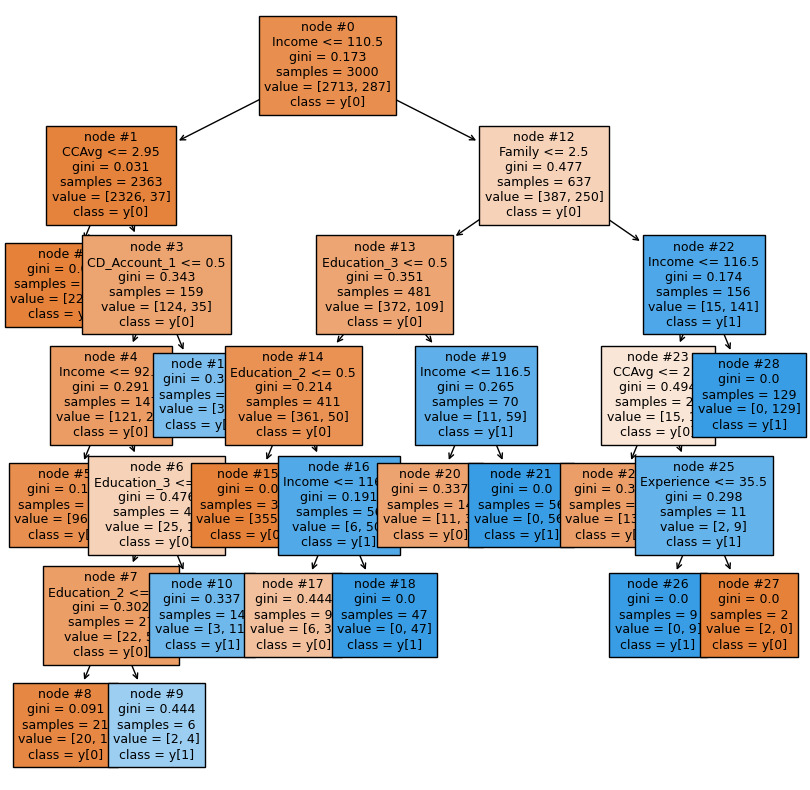

In [59]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [60]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2202.00, 2.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [96.00, 10.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |--- weights: [20.00, 1.00] class: 0
|   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |--- weights: [2.00, 4.00] class: 1
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- weights: [3.00, 11.00] class: 1
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [3.00, 9.00] class: 1
|--- Income >  110.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [355.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 116.50
|   |   |   |   |   |--- weights: [6.00, 3.00] class: 

In [61]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                           Imp
Income                0.387520
Family                0.230096
Education_2           0.171841
Education_3           0.146658
CCAvg                 0.041395
CD_Account_1          0.015521
Experience            0.006969
ID                    0.000000
Age                   0.000000
Mortgage              0.000000
Securities_Account_1  0.000000
Online_1              0.000000
CreditCard_1          0.000000


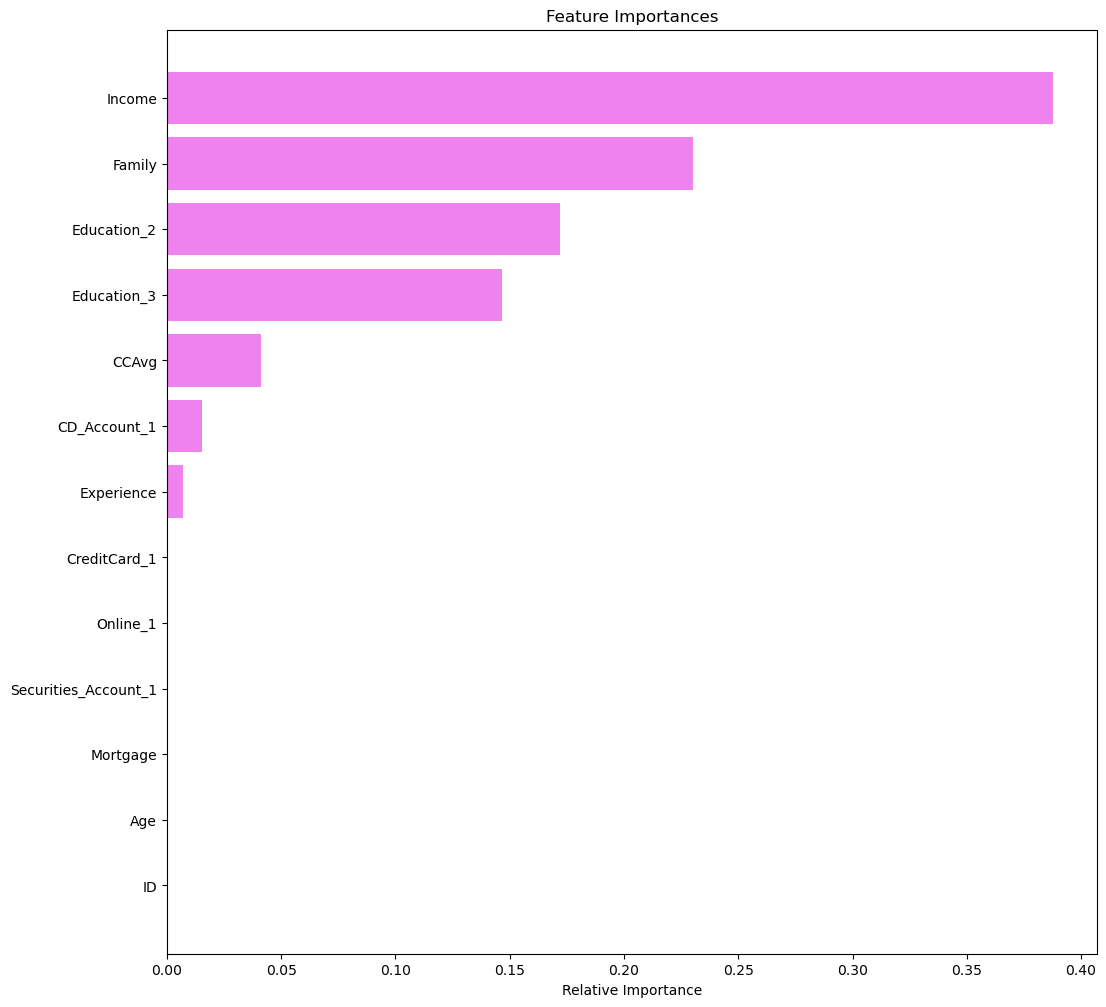

In [62]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

In [63]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre_Pruning)",
    "Decision Tree (Post_Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre_Pruning)  \
Accuracy                     1.0                          1.0   
Recall                       1.0                          1.0   
Precision                    1.0                          1.0   
F1                           1.0                          1.0   

           Decision Tree (Post_Pruning)  
Accuracy                       0.990000  
Recall                         0.923345  
Precision                      0.970696  
F1                             0.946429

In [64]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.979500                     0.984500   
Recall                  0.870466                     0.901554   
Precision               0.913043                     0.935484   
F1                      0.891247                     0.918206   

           Decision Tree (Post-Pruning)  
Accuracy                       0.982500  
Recall                         0.875648  
Precision                      0.938889  
F1                             0.906166

- Recall score for decision tree (pre - pruning) is the highest among the three decision trees (value = 0.90). yet, this model will not be the final choice, due to complex nature of its tree. The complexity makes it unfeasible to adopt it for business decision making to evaluate whether a customer should be targeted for Personal Loan campaign in a prompt manner.
- Specifically, the complexity of decision tree (pre - pruning) is too complicated because its max_depth is much greater than the max_depth of decision tree (post - pruning)
- Instead, the complexity of decision tree (post - pruning) is comparatively simple and more straightforward. Furthermore, the difference in the recall score for decision tree (post - pruning = 0.88) is rather close to  decision tree (pre - pruning = 0.90) [difference of 0.02]. Also, the recall score for decision tree (post - pruning) is slightly higher than the recall score for decision tree (sklearn).
- The recall score for decision tree (post - pruning = 0.8756) is still slightly higher than the recall score for the decision tree (sk learn = 0.8705).
- It may be better to select the decision tree (post - pruning) as the chosen decision tree model. 
- The advantages of chosing a (post - pruning) decision tree with a more straightforward structure outweighs the gains of chosing the (pre-pruning)  decision tree merely to increase the recall score by a value of 0.02.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

- The most important variables in the decision tree is the following in decreasing order - Income, Family, Education_2, Education_3, CCAvg, CD_Account_1, Experience. From the feature_importances_ table, their respective values are (with the unmentioned variables having a importance value of 0): 
Income                0.387520
Family                0.230096
Education_2           0.171841
Education_3           0.146658
CCAvg                 0.041395
CD_Account_1          0.015521
Experience            0.006969

- All these customer with the following characteristics are more likely to take a Personal loan:

1) Income <=110.50 , (Average credit card spending per month) CCAvg > 2.95 ,  (presence of certificate of deposit account) CD_Account_1 <= 0.50 , Income >92.50 and Education_3 <= 0.5 and Education_2 > 0.50.
2) Income <=110.50 , (Average credit card spending per month) CCAvg > 2.95 ,  (presence of certificate of deposit account) CD_Account_1 <= 0.50 , Income >92.50 and Education_3 > 0.50.
3) Another case with these characteristics is more likely to take a loan. Income <=110.50 , (Average credit card spending per month) CCAvg > 2.95 ,  (presence of certificate of deposit account) CD_Account > 0.50

4) Income >110.50 , Family <= 2.50, Education_3 <= 0.50, Education_2 > 0.5, Income > 116.50.
5) Income >110.50 , Family <= 2.50, Education_3 > 0.50, Income > 116.50.
6) Income >110.50 , Family > 2.50, Income <= 116.50, CCAvg > 2.70 and Experience <= 35.50.
7) Income >110.50 , Family <= 2.50, Income > 116.50.

- The metrics to focus on to predict customer will take up loan concern these six factors  - Income, Family, Education, CCAvg, CD_Account, Experience.

- For recommendations, the bank could consider targetting their marketing and outreach efforts to the 7 groups above, in order to maximise their budget spent. To name some relevant variables, they could identify to focus their outreach for Personal Loan promotion to people with Higher Income, Smaller Family Size,  Education levels of Graduate and Advance/Professional.
- The bank should continue to monitor the accuracy of the models and decision trees generated as the sample size of customer grows as there could be changes in the population data or seasonal trends. This will ensure the accuracy of targetting the right groups to focus on persuading to take up a Personal Loan. 
- The bank can even expand to collect information on the likelihood of certain groups defaulting on the Personal Loan, so as to assess the costs or losses from marketing to these groups of customers. 
- The bank can segment and profile their customers into differentiated groups based on the variables (feature_importances) in the decision tree structure. This will enable the bank to focus on collecting information of feature_importance variables on the customer, group these customers together and target them accurately in promoting a Personal Loan to them. 


___